In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/atarockz/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['expm1', 'seterr', 'log1p', 'errstate', 'exp2', 'erf', 'geterr', 'beta', 'gamma', 'i0', 'cbrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
G = 4.302e-3 #pcSM(km/s)**2

Perfil de densidad $\rho_{DM}(r) = \rho_{0} \frac{r}{r_{DM}}^{-\gamma_{DM}} (1 + (\frac{r}{r_{DM}})^{\alpha_{DM}})^{(\gamma_{DM} - \beta_{DM})/\alpha_{DM}}$


donde $M(r) = 4\pi \int_{0}^{r} \rho(r') r'^{2} dr'$

entonces $M(r) = 4\pi \int_{0}^{r} \rho_{0} (\frac{r'}{r_{DM}})^{-\gamma_{DM}} (1 + (\frac{r'}{r_{DM}})^{\alpha_{DM}})^{(\gamma_{DM} - \beta_{DM})/\alpha_{DM}} r'^{2} dr'$

$M(r) = 4\pi \rho_{0} \frac{r^{3}(\frac{r}{r_{DM}})^{\gamma} 2F_{1}(\frac{\beta - \gamma}{\alpha};\frac{\gamma + 3}{\alpha};\frac{\alpha + \gamma + 3}{\alpha};-\frac{r}{r_{DM}}^{\alpha})}{\gamma + 3}\mid_{0}^{r}$

donde $2F_{1} = \sum_{n=0}^{\infty} \frac{(\frac{\beta - \gamma}{\alpha})_{n} (\frac{\gamma + 3}{\alpha})_{n}}{(\frac{\alpha + \gamma + 3}{\alpha})_{n}}\frac{(-(\frac{r}{r_{DM}})^{\alpha})^{n}}{n!}$

In [3]:
#alpha = 1.
#beta = 3.
#gamma = 0.
#r_DM = 1.#r_DM/kpc
#rho_0 = 0.064

In [4]:
r = np.linspace(0.,100.,1000)

In [17]:
#Función para M(r)
#Nota al definir una función con parámetros fijos, primero poner indeterminados
def M_PW(r, alpha=1., beta=3., gamma=0., r_DM=1., rho_0=0.064):
    a = [(beta-gamma)/alpha]
    b = [(gamma +3.)/alpha]
    c = [(alpha + gamma + 3.)/alpha]
    z = -(r/r_DM)**alpha
    K = 4.*np.pi*rho_0
    f = (r**3.)*(r/r_DM)**gamma/(gamma + 3.)
    M = K*f*hyp2f1(a, b, c, z)
    return M

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


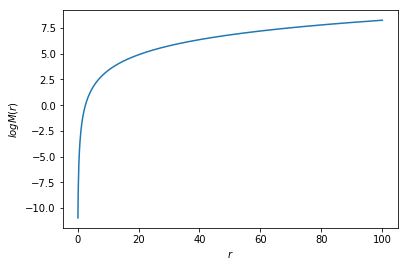

In [6]:
plt.plot(r,np.log(M_PW(r, alpha=1., beta=3., gamma=1., r_DM=1., rho_0=0.064)))
plt.xlabel(r'$r$')
plt.ylabel(r'$logM(r)$')
plt.show()

In [7]:
def Vc(r,M):
    V_c = np.sqrt(G*M/r)
    return V_c

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


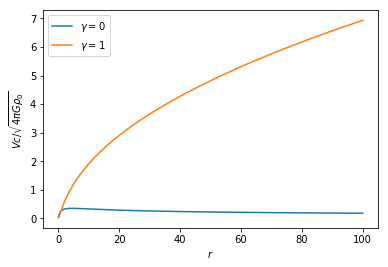

In [20]:
rho_0=0.064
plt.plot(r,Vc(r,M_PW(r))/np.sqrt(4.*np.pi*G*rho_0), label=r'$\gamma = 0$')
plt.plot(r,Vc(r,M_PW(r, gamma=1.))/np.sqrt(4.*np.pi*G*rho_0),label=r'$\gamma = 1$')
plt.xlabel(r'$r$')
plt.ylabel(r'$Vc/\sqrt{4\pi G\rho_{0}}$')
plt.legend(loc='upper left', prop={'size':10})
plt.show()

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


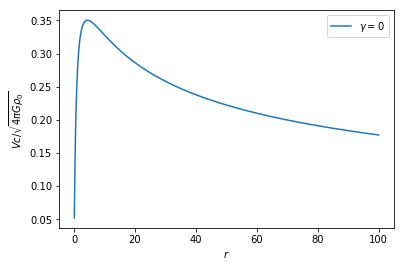

In [22]:
plt.plot(r,Vc(r,M_PW(r))/np.sqrt(4.*np.pi*G*rho_0), label=r'$\gamma = 0$')
plt.xlabel(r'$r$')
plt.ylabel(r'$Vc/\sqrt{4\pi G\rho_{0}}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


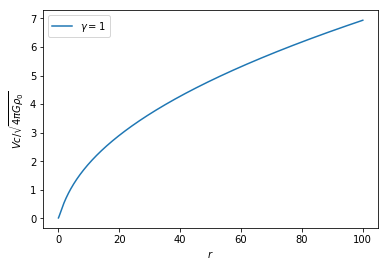

In [24]:
plt.plot(r,Vc(r,M_PW(r,gamma=1.))/np.sqrt(4.*np.pi*G*rho_0), label=r'$\gamma = 1$')
plt.xlabel(r'$r$')
plt.ylabel(r'$Vc/\sqrt{4\pi G\rho_{0}}$')
plt.legend(loc='upper left', prop={'size':10})
plt.show()